# <b>Fondamenti di Analisi Dati</b> - a.a. 2019/2020

## 13 LDA

La Linear Discriminant Analysis (LDA) permette di trovare una trasformazione lineare che mappi un insieme di dati suddivisi in $K$ classi in uno spazio a $K-1$ dimensioni nel quale i dati risultino massimamente separabili. Ad esempio, nel caso della classificazione binaria i dati verranno proiettati in uno spazio monodimensionale nel quale risultino separabili. Il termine LDA è spesso usato in maniera intercambiabile con il termine "Fisher's discriminant analysis". In effetti le due tecniche sono molto simili, anche se presentano alcune differenze nelle premesse. Noi ci soffermeremo sulla fomulazione del discriminante di Fisher. 

La LDA ha dei punti di contatto con la tecnica della PCA in quanto **entrambe cercano di mappare i dati in un sottospazio che abbia determinate caratteristiche**. Esistono tuttavia due differenze fondamentali:
 * La **PCA** è un metodo **non supervisionato**, nel senso che non richiede di fornire alcuna etichetta (classi di appartenenza dei dati). La **LDA** invece è un metodo **supervisionato**, in quanto utilizza le etichette per trovare la proiezione dei dati che li renda separabili;
 * Quando applichiamo la **PCA**, siamo noi a specificare il numero di componenti dello spazio di destinazione. La **LDA** invece proietta i dati **sempre** in uno spazio di dimensionalità $K-1$, dove $K$ è il numero di classi.

## 13.1 Discriminante Lineare di Fisher

Siano $\{x_i\}_{i=1}^N$ un insieme di osservazioni $D$-dimensionali suddivise in due classi $C_1$ e $C_2$ in modo che $x_i \in C_1 \oplus x_i \in C_2$. Vogliamo trovare una trasformazione lineare dei dati in uno spazio monodimensionale:

\begin{equation}
y(\mathbf{x}) = \mathbf{w}^T \mathbf{x}
\end{equation}

dove $\mathbf{x}$ è una osservazione $D$-dimensionale, $\mathbf{w}$ è un vettore $D$-dimensionale detto **vettore dei pesi** e $y(\mathbf{x})$ è la proiezione su una dimensione di $\mathbf{x}$ (dunque, $y(\mathbf{x})$ è uno scalare). Se la proiezione trovata massimizza la separabilità dei dati, non ci resta che trovare una soglia $y_0$ e classificare:

\begin{eqnarray}
\mathbf{x} \ appartenente\ a\  C_1 && se\ y(\mathbf{x})\geq y_0 \\
\mathbf{x} \ appartenente\ a\ C_2 && se\ y(\mathbf{x})<y_0
\end{eqnarray}

Vediamo prima come trovare i parametri $\mathbf{w}$ che massimizzino la separabilità dei dati proiettati. Consideriamo le medie dei dati appartenenti alle due classi:

\begin{eqnarray}
\mathbf{m}_1 = \frac{1}{N_1} \sum_{x_i \in C_1} x_i, \ \ \ \ \ \ \ \ \mathbf{m}_2 = \frac{1}{N_2} \sum_{x_i \in C_2} x_i,
\end{eqnarray}

dove $N_1=|\{x_i\ |\ x_i \in C_1\}|$ è il numero di elementi appartenenti alla classe $C_1$ e $N_2=|\{x_i\ |\ x_i \in C_2\}|$ è il numero di elementi appartenenti alla classe $C_2$. La misura più semplice di separabilità tra le classi sarebbe la distanza tra le medie delle classi calcolate sui dati proiettati:

\begin{equation}
m_{1p} = \mathbf{w}^T\mathbf{m}_1, \ m_{2p} = \mathbf{w}^T\mathbf{m}_2 \\
m_{2p} - m_{1p} = \mathbf{w}^T(\mathbf{m}_2-\mathbf{m}_1)
\end{equation}

Per massimizzare la quantità $m_{2p}-m_{1p}$, inseriamo il vincolo che $\mathbf{w}$ sia un vettore unitario ($\mathbf{w}^T\mathbf{w}=1$). Introducendo un moltiplicatore di Lagrange, dobbiamo massimizzare:

\begin{equation}
\mathbf{w}^T (\mathbf{m}_2-\mathbf{m}_1) + \lambda (1-\mathbf{w}^T\mathbf{w})
\end{equation}

Ponendo la derivata rispetto a $\mathbf{w}$ uguale a zero, vediamo che una soluzione è data da:

\begin{equation}
\mathbf{w}^* = \frac{\mathbf{m}_2-\mathbf{m}_1}{||\mathbf{m}_2-\mathbf{m}_1||}
\end{equation}

Questa soluzione tuttavia non ci garantisce nulla sulla varianza dei dati all'interno di una singola classe, che va minimizzata per assicurare una maggiore separabilità. Consideriamo il seguente esempio:

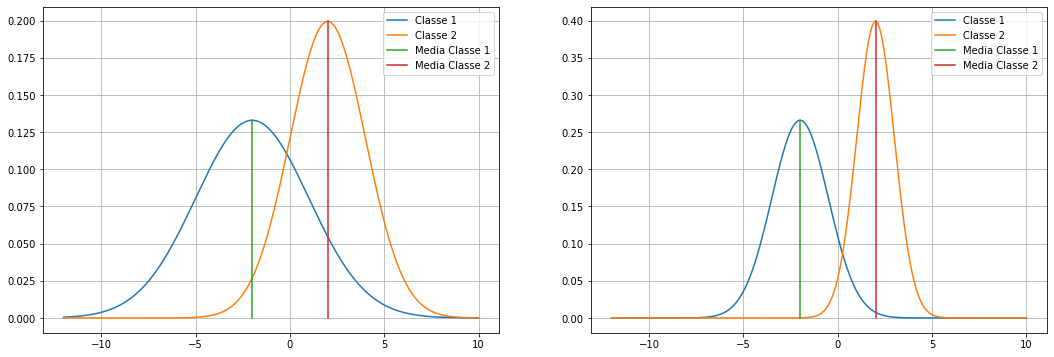

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(18,6))
plt.subplot(121)
g1 = norm(-2,3)
g2 = norm(2,2)

x=np.linspace(-12,10,500)
plt.plot(x,g1.pdf(x))
plt.plot(x,g2.pdf(x))
plt.plot([-2,-2],[0,g1.pdf(-2)])
plt.plot([2,2],[0,g2.pdf(2)])
plt.legend(['Classe 1','Classe 2','Media Classe 1', 'Media Classe 2'])
plt.grid()

plt.subplot(122)
g3 = norm(-2,1.5)
g4 = norm(2,1)
plt.plot(x,g3.pdf(x))
plt.plot(x,g4.pdf(x))
plt.plot([-2,-2],[0,g3.pdf(-2)])
plt.plot([2,2],[0,g4.pdf(2)])
plt.legend(['Classe 1','Classe 2','Media Classe 1', 'Media Classe 2'])
plt.grid()
plt.show()

Oltre a massimizzare la distanza tra le medie, vogliamo duqnue anche minimizzare le varianze dei dati appartenenti alle singole classi date da:

\begin{equation}
s_k^2 = \frac{1}{N_k} \sum_{\mathbf{x}_i \in C_k} (\mathbf{x}_i - m_k)^2,\ k=1,2
\end{equation}

Per **massimizzare la distanza tra le medie trasformate** e **minimizzare le varianze dei dati trasformati**, viene definito il criterio di Fisher come segue:

\begin{equation}
J(\mathbf{w}) = \frac{(m_2-m_1)^2}{s_1^2+s_2^2}
\end{equation}

Massimizzando $J(\mathbf{w})$ rispetto a $\mathbf{w}$, raggiungiamo entrambi gli obiettivi:
 * Massimizziamo $(m_2-m_1)$ che si trova al numeratore;
 * Minimizziamo $s_1^2+s_2^2$ che si trova al denominatore.
 
Il criterio di Fisher può essere riscritto in forma esplicita come dipendente da $\mathbf{w}$ come segue:

\begin{equation}
J(\mathbf{w}) = \frac{\mathbf{w}^T \mathbf{S}_B\mathbf{w}}{\mathbf{w}^T \mathbf{S}_W\mathbf{w}}
\end{equation}

Dove $\mathbf{S}_B$ è la **between-class covariance matrix** (matrice di covarianza intra-classe) ed è data da:

\begin{equation}
\mathbf{S}_B = (\mathbf{m}_2-\mathbf{m}_1)(\mathbf{m}_2-\mathbf{m}_1)^T
\end{equation}

e $\mathbf{S}_W$ è la **within-class covariance matrix** totale (matrice di covarianza inter-classe) ed è data da:

\begin{equation}
\mathbf{S}_W = \sum_{\mathbf{x}_i \in C_1}(\mathbf{x}_i-\mathbf{m}_1)(\mathbf{x}_i-\mathbf{m}_1)^T + \sum_{\mathbf{x}_i \in C_2}(\mathbf{x}_i-\mathbf{m}_2)(\mathbf{x}_i-\mathbf{m}_2)^T
\end{equation}

La quantità $J(\mathbf{w})$ risulta essere massimizzata da:

\begin{equation}
\mathbf{w}\propto\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})
\end{equation}

Per cui, una possibile soluzione è:

\begin{equation}
\mathbf{w}^* = \frac{\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})}{||\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})||}
\end{equation}

Notiamo che se la matrice di covarianza inter-classe è diagonale, la soluzione trovata è equivalente a quella trovata massimizzando solo $\mathbf{m}_2-\mathbf{m}_1$.

Una volta trovata la proiezione ottimale $\mathbf{w}$ possiamo proiettare i dati mediante $y(\mathbf{x})=\mathbf{w}^T\mathbf{x}$. Dobbiamo dunque trovare la soglia $y_0$ per classificare i dati utilizzando il discriminante $y(x)\geq y_0$. La soglia ottimale $y_0$ può essere trovata modellando i dati delle due classi mediante due Gaussiane e trovando il punto in cui esse si intersecano.

## 13.2 Esempio: Breast Cancer Dataset

Vediamo un esempio utilizzando come dataset il "Breast Cancer Wisconsin (Diagnostic) Database". Possiamo caricarlo tramile **scikit-learn**:

In [2]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

Il dataset contiene 30 misurazioni derivate da campioni di masse estratte da seni. Ognuno di questo campione è classificato come "maligno" (classe 0) o "benigno" (classe 1). Le misurazioni sono contenute in `bcancer.data`, mentre le classi sono contenute in `bcancer.target`. Stampare `bcancer.DESCR` per visualizzare una descrizione del dataset. Consideriamo come feature solo le prime due features (raggio medio e tessitura media):

In [3]:
X = bcancer.data[:,np.array([0,1])].T # features
C = bcancer.target #classi

Visualizziamo i dati in un plot 2D:

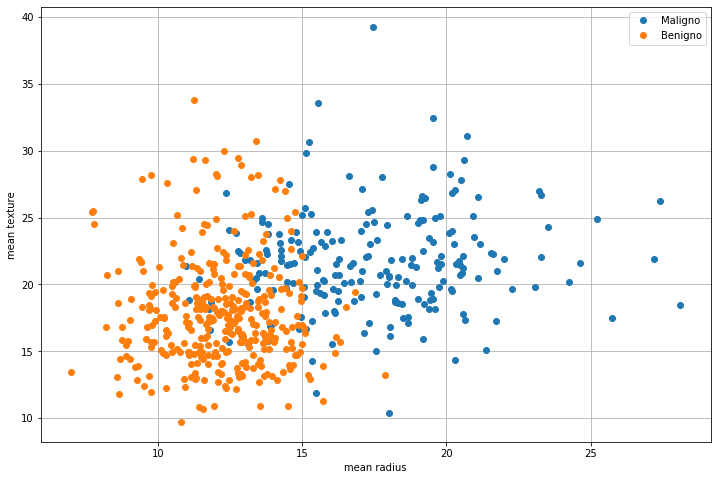

In [4]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o')
plt.legend(['Maligno','Benigno'])
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
plt.grid()
plt.show()

Calcoliamo le medie relative alle due classi e visualizziamole nel plot:

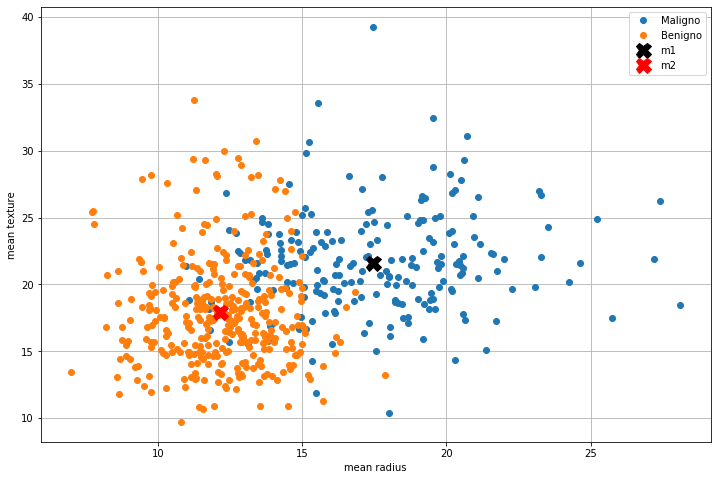

In [5]:
m1 = X[:,C==0].mean(1)
m2 = X[:,C==1].mean(1)

plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o')
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
plt.plot(m1[0],m1[1],'Xk',markersize=15)
plt.plot(m2[0],m2[1],'Xr',markersize=15)
plt.legend(['Maligno','Benigno','m1','m2'])
plt.grid()
plt.show()

Calcoliamo ora la matrice $\mathbf{S}_W$:

In [6]:
SW = np.cov(X[:,C==0]) + np.cov(X[:,C==1])

La soluzione secondo il criterio di Fisher è:

In [7]:
from scipy.linalg import inv
w = inv(SW).dot((m2-m1))
w=w/np.sqrt((w**2).sum())
print(w)

[-0.96270156 -0.27056552]


Proiettiamo i dati utilizzando il vettore $\mathbf{w}$ appena trovato:

In [8]:
Y=w.T.dot(X)
print(Y.shape) #adesso i dati sono unidimensionali

(569,)


Per visualizzare come i dati si dispongono nel nuovo spazio, visualizziamo i due relativi istogrammi:

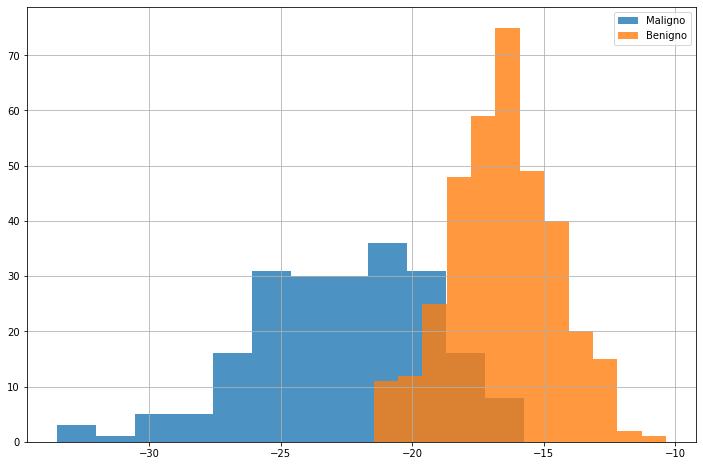

In [9]:
plt.figure(figsize=(12,8))
plt.hist(Y[C==0],alpha=0.8,bins=12)
plt.hist(Y[C==1],alpha=0.8,bins=12)
plt.legend(['Maligno','Benigno'])
plt.grid()
plt.show()

Ora che i dati sono unidimensionali, possiamo provare a classificarli con una soglia. Utilizziamo il criterio MAP per trovare quella ottimale. Facciamo fit di due Gaussiane:

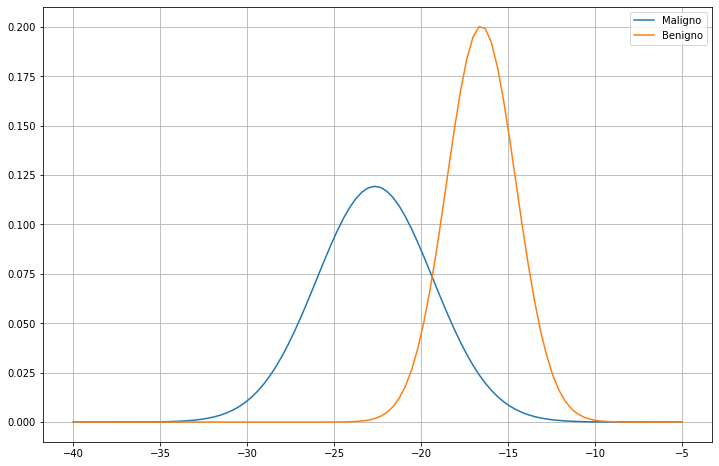

In [10]:
from scipy.stats import norm
g0 = norm(*norm.fit(Y[C==0]))
g1 = norm(*norm.fit(Y[C==1]))

x=np.linspace(-40,-5,100)

plt.figure(figsize=(12,8))
plt.plot(x,g0.pdf(x))
plt.plot(x,g1.pdf(x))
plt.legend(['Maligno','Benigno'])
plt.grid()
plt.show()

Come abbiamo già visto, la soglia ottimale è data dal punto in cui si intersecano le due Gaussiane. Utilizziamo il metodo visto in precedenza per farlo:

In [11]:
def risolvi(mu_1,mu_2,sigma_1,sigma_2):
    a = 1.0/(2*sigma_1**2) - 1.0/(2*sigma_2**2)
    b = mu_2/(sigma_2**2) - mu_1/(sigma_1**2)
    c = mu_1**2 /(2*sigma_1**2) - mu_2**2 / (2*sigma_2**2) - np.log(sigma_2/sigma_1)
    return np.roots([a,b,c])

solutions = risolvi(g0.mean(),g1.mean(),g0.std(), g1.std())
print (solutions)

[-19.36113911  -7.01507854]


Scartiamo la seconda soluzione (in quel punto le Gaussiane sono quasi entrambe nulle) e teniamo la prima come soglia ottimale $y_0$:

In [12]:
y0=solutions[0]

Possiamo dunque classificare i dati mediante la regola $y(\mathbf{x})\geq y_0$:

In [13]:
predictions = Y>=y0;

Calcoliamo l'accuracy del classificatore appena costruito:

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(C,predictions))

0.8910369068541301


## 13.3 Interpretazione geometrica dei coefficienti

Mettendo insieme la proiezione LDA e la classificazione mediante soglia $y(\mathbf{x})$, abbiamo costruito il **discriminante lineare**:

\begin{equation}
z(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0
\end{equation}

dove $w_0=-y_0$. Utilizzando il discriminante, possiamo classificare i dati come segue:

\begin{eqnarray}
\mathbf{x}\ appartenente\ a\ C_1 &\ \ & se\ z(\mathbf{x})\geq 0 \\
\mathbf{x}\ appartenente\ a\ C_2 &\ \ & se\ z(\mathbf{x})< 0
\end{eqnarray}

Questo schema di classificazione è del tutto equivalente a quello visto in precedenza, ma questo modo di vedere le cose ci permette di fare alcune considerazioni geometriche.

Il classificatore lineare separa i dati nel loro spazio di appartenenza $D$-dimensionale mediante un iperpiano $D-1$ dimensionale definito dalla formula $z(\mathbf{x})=0$. Questo iperpiano di separazione è in genere detto "decision boundary". Ad esempio, se i dati sono bidimensionali, il discriminante può essere espresso come $z((x,y)) = w_1 x + w_2 y + w_0$ e l'iperpiano che separa i dati è la retta di equazione $w_1 x + w_2 y + w_0=0$ o, in forma esplicita $y=-\frac{w_1}{w_2}x-\frac{w_0}{w_2}$ Proviamo a graficarla nel caso del nostro esempio:

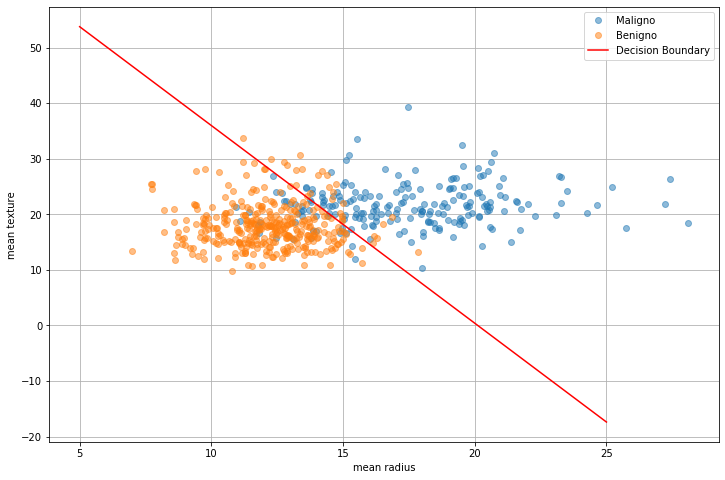

In [15]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o',alpha=0.5)
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
x1 = 5; x2 = 25;
y1 = -w[0]/w[1]*x1+y0/w[1]
y2 = -w[0]/w[1]*x2+y0/w[1]
plt.plot([x1,x2],[y1,y2],'r')
plt.legend(['Maligno','Benigno','Decision Boundary'])
plt.grid()
plt.show()

In generale, siano $\mathbf{x}_A$ e $\mathbf{x}_B$ due punti distinti che si trovano sul decision boundary. Si ha:

\begin{equation}
z(\mathbf{x}_A)=z(\mathbf{x}_B)=0 \Rightarrow \mathbf{w}^T(\mathbf{x}_A-\mathbf{x}_B)=0
\end{equation}

da cui evinciamo che **il vettore w è ortogonale all'iperpiano che separa i dati (il decision bounday)**. Inoltre, la distanza tra l'iperpiano e l'origine è data da:

\begin{equation}
\frac{|\mathbf{w}^T_{0}+w_0|}{||\mathbf{w}||} = \frac{|w_0|}{||\mathbf{w}||}
\end{equation}

Non dobbiamo inoltre dimenticare che, dato che proiettiamo i dati mediante l'espressione $z(\mathbf{x})=\mathbf{w}^Tx$, $\mathbf{w}$ rappresenta la direzione lungo la quale i dati saranno proiettati.

Possiamo dunque interpretare i parametri trovati come segue:
 * $\mathbf{w}$ indica la direzione lungo la quale i dati verranno proiettati ed è **ortogonale** al decision bounday;
 * $w_0$ indica la distanza tra l'origine e il decision boundary secondo la formula $\frac{|w_0|}{||\mathbf{w}||}$
 
Vediamo di graficare il vettore $\mathbf{w}$:

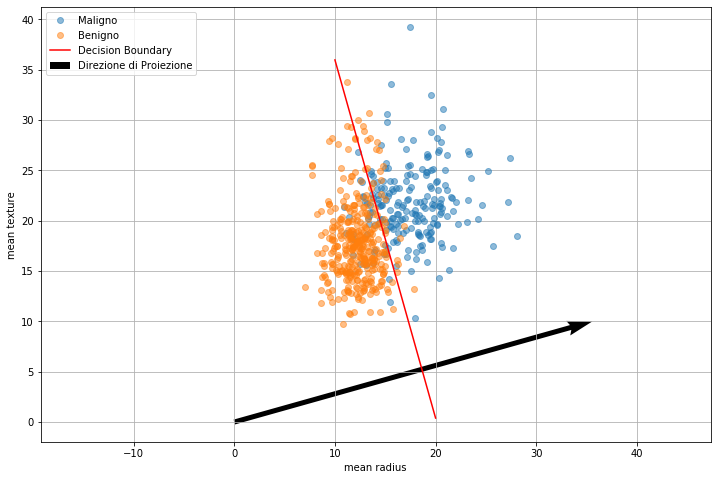

In [16]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o',alpha=0.5)
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
x1 = 10; x2 = 20;
y1 = -w[0]/w[1]*x1+y0/w[1]
y2 = -w[0]/w[1]*x2+y0/w[1]
plt.plot([x1,x2],[y1,y2],'r')
plt.quiver(0,0,-w[0],-w[1],scale=1.8)
plt.axis('equal')
plt.legend(['Maligno','Benigno','Decision Boundary','Direzione di Proiezione'],loc=2)
plt.grid()
plt.show()

## 13.4 Implementazione di Scikit-Learn

Scikit-Learn contiene una implementazione ottimizzata della LDA che generalizza anche al caso di più di due classi. Vediamo come utilizzarla:

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X.T,bcancer.target)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

La proiezione mediante LDA avviene come segue:

In [18]:
Y=lda.transform(X.T)
print(Y.shape)

(569, 1)


L'implementazione di **scikit-learn** trova anche una soglia $w_0$, il che permette di effettuare direttamente le predizioni come segue:

In [19]:
preds=lda.predict(X.T)

Possiamo anche ottenere l'accuracy del modello come segue:

In [20]:
lda.score(X.T,bcancer.target)

0.8857644991212654

Vediamo come accedere ad alcuni dei parametri interni:

In [21]:
print("Coefficienti della LDA (w)",lda.coef_)
print("Valore soglia (w_0)",lda.intercept_)
print("Medie dei valori in ingresso\n",lda.means_)

Coefficienti della LDA (w) [[-0.90292832 -0.2221124 ]]
Valore soglia (w_0) [18.27761577]
Medie dei valori in ingresso
 [[17.46283019 21.60490566]
 [12.14652381 17.9147619 ]]


## 13.5 LDA nel caso di più classi

La LDA può essere generalizzata al caso in cui siano disponibili più di due classi. In questo caso, i dati verranno proiettati in uno spazio $K-1$ dimensionale, dove $K$ è il numero totale di classi. La proiezione viene sempre effettuata in maniera tale da garantire la separabilità della classi. In generale dunque, l'analisi LDA troverà una matrice di pesi $W$ di dimensione $D \times K-1$ che permetta di trasformare i dati in una nuova matrice $Y$ di dimensione $K-1 \times N$:

\begin{equation}
Y=W^T X
\end{equation}

I nuovi dati possono essere utilizzati per allenare successivamente un classificatore. Consideriamo ad esempio il dataset degli iris di Fisher:

In [22]:
from statsmodels.datasets import get_rdataset
iris = get_rdataset('iris')
iris.data.head()

C:\Users\visig\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il dataset contiene quattro features e tre classi. Utilizzando la tecnica LDA possiamo proiettare i dati in uno spazio bidimensionale nel quale le classi risultino massimamente separate:

In [23]:
lda = LDA()
lda.fit(iris.data.drop('Species',axis=1),iris.data.Species)
iris_lda=lda.transform(iris.data.drop('Species',axis=1))
print(iris_lda.shape)

(150, 2)


Abbiamo così proiettato i dati su due dimensioni. Proviamo a plottare i dati classe per classe:

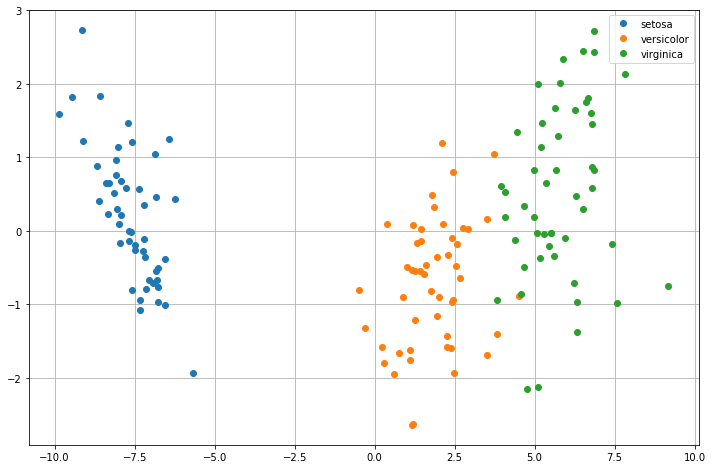

In [24]:
plt.figure(figsize=(12,8))
#otteniamo le tre classi uniche dal dataset
classes = np.unique(iris.data['Species'])
for s in classes:
    class_data = iris_lda[iris.data['Species']==s]
    plt.plot(class_data[:,0],class_data[:,1],'o')
plt.grid()
plt.legend(classes)
plt.show()

Le classi sono adesso linearmente separabili. Possiamo provare ad allenare un classificatore Naive Bayes Gaussiano a partire da queste features:

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(iris_lda,iris.data.Species)
print("Accuracy: %0.2f" % model.score(iris_lda,iris.data.Species))

Accuracy: 0.98


## - LDA- Fine